In [ ]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def fourier_series(x, *params):

    a0 = params[0]
    n = (len(params) - 1) // 2
    
    cos_terms = params[1:1 + n]
    sin_terms = params[1 + n:]
    
    result = a0 / 2.0

    for k in range(n):
        result += cos_terms[k] * np.cos((k + 1) * x)
        result += sin_terms[k] * np.sin((k + 1) * x)

    return result

def fit_fourier_series(x_data, y_data, n_terms=3):

    initial_guess = [0.0] * (2 * n_terms + 1)
    
    # Perform curve fitting using least squares
    params, covariance = curve_fit(fourier_series, x_data, y_data, p0=initial_guess)

    return params

# Example usage:
if __name__ == "__main__":
    
    # Generate some example data
    x_data = np.linspace(0, 4 * np.pi, 100)
    y_true = 2.0 * np.sin(x_data) + 0.5 * np.cos(2 * x_data) + 1.0 * np.sin(3 * x_data)
    noise = np.random.normal(0, 0.5, len(x_data))
    y_data = y_true + noise
    
    # Fit Fourier series to the data
    optimal_params = fit_fourier_series(x_data, y_data, n_terms=10)
    
    # get the model out
    
    model = fourier_series(x_data, *optimal_params)
    
    print("Optimal parameters:", optimal_params)

Optimal parameters: [ 5.95077525e-02  2.14121283e-02  3.51550370e-01  1.39685350e-01
  6.16971954e-02  3.63710796e-02  1.50099057e-01  9.88245218e-02
 -3.14723766e-02 -4.35614046e-02  3.68679936e-04  2.01277111e+00
  5.06349509e-02  1.13871002e+00  5.54471793e-02 -1.30700543e-01
  1.42313967e-02  3.95020385e-02  5.73077791e-02  3.56531820e-02
  1.51754691e-01]


<IPython.core.display.Javascript object>


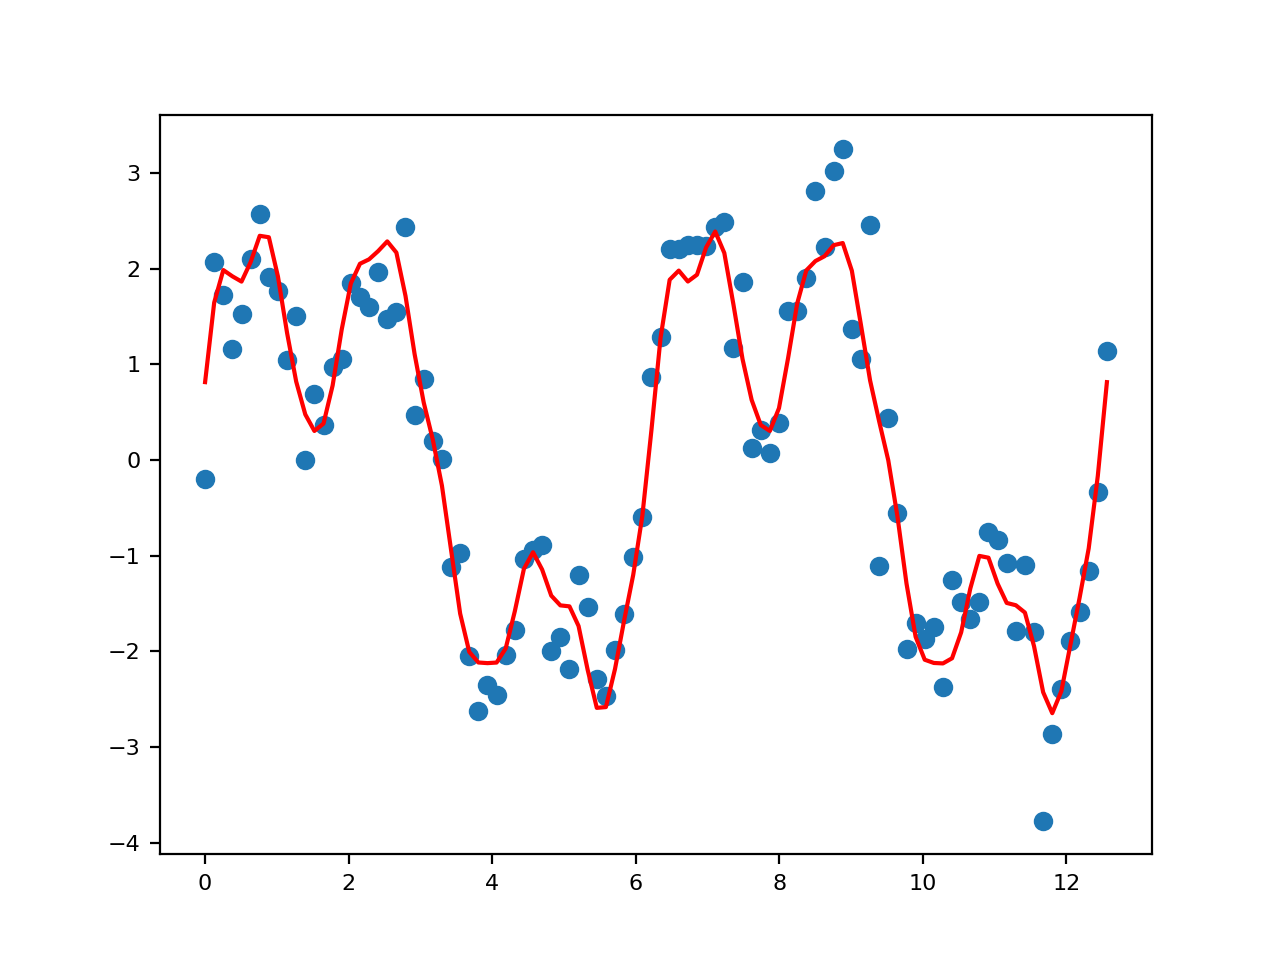

In [74]:
fig, ax = plt.subplots()

plt.scatter(x_data, y_data)
plt.plot(x_data, model, color = 'red')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10] [0 0 0 0 0 0 2 0 0 0 0]


<IPython.core.display.Javascript object>


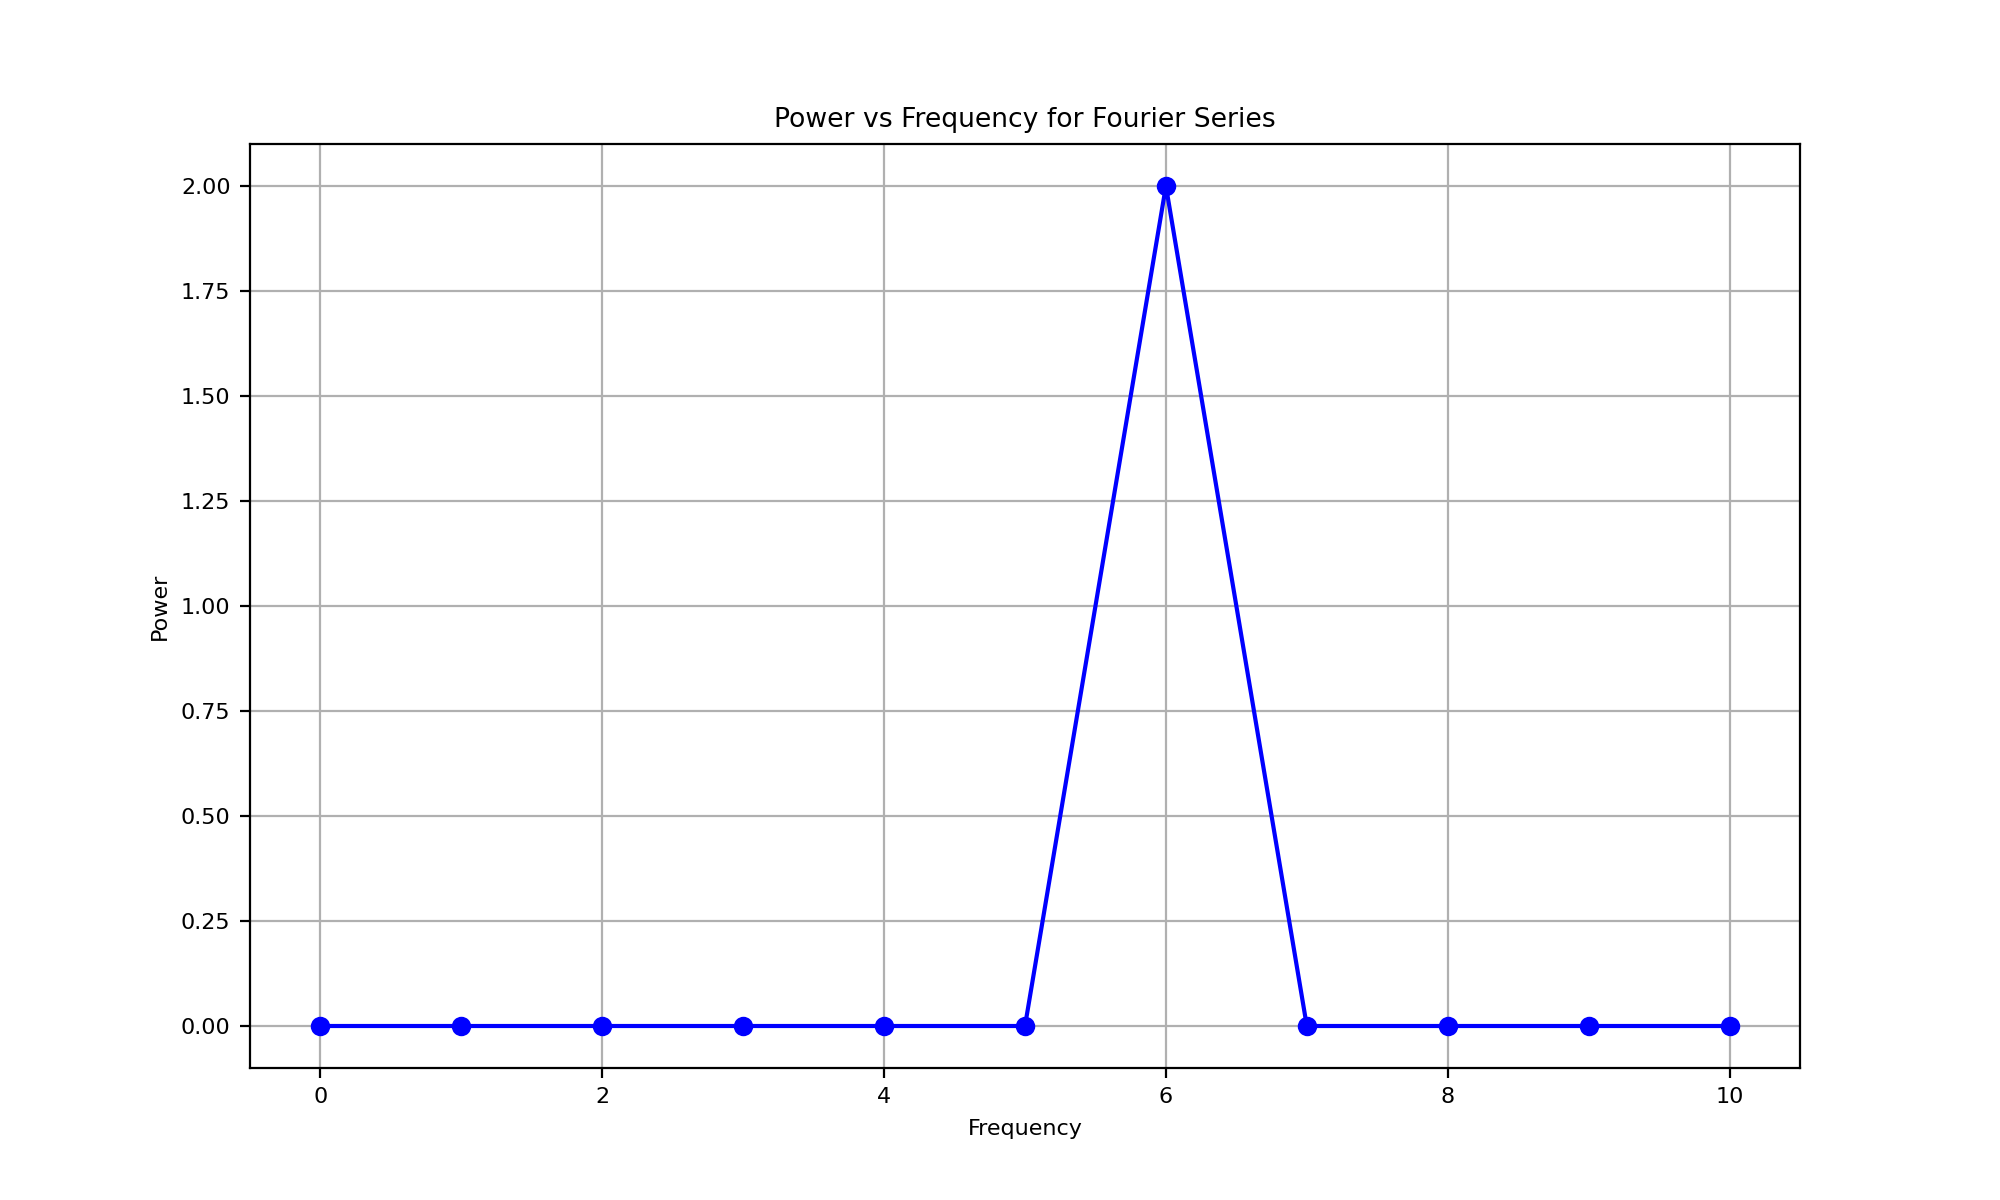

In [80]:
def plot_power_vs_frequency(optimal_params, num_points=1000, xlim=None):
    n_terms = (len(optimal_params) - 1) // 2

    frequencies = np.arange(0, n_terms + 1)
    power = np.zeros_like(frequencies)

    for i, freq in enumerate(frequencies):
        if freq == 0:
            power[i] = optimal_params[0] ** 2 / 2.0
        else:
            idx_cos = 2 * (freq - 1) + 1
            idx_sin = 2 * (freq - 1) + 2
            power[i] = (optimal_params[idx_cos] ** 2 + optimal_params[idx_sin] ** 2) / 2.0

    print (frequencies, power)
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, power, marker='o', linestyle='-', color='b')
    plt.title('Power vs Frequency for Fourier Series')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.grid(True)

    if xlim:
        plt.xlim(xlim)

    plt.show()

# Example usage:
if __name__ == "__main__":
    # Using the optimal_params obtained from the previous example
    plot_power_vs_frequency(optimal_params, num_points=1000)